# 로이터 뉴스 데이터에 분류

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 데이터 불러오기
from tensorflow.keras.datasets import reuters
# num_words로 사용할 단어 수 지정 가능, None일 경우 데이터셋에 존재하는 모든 단어 사용(데이터 확인용)
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)


In [14]:
X_train

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [16]:
# 데이터셋 구조 확인(훈련용 데이터 개수, 테스트용 데이터 개수, 카테고리 수 등)
np.percentile(len([x for x in X_train]),99)

8982.0

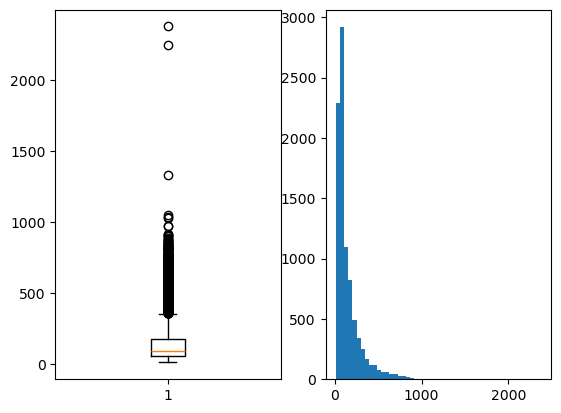

In [5]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import sequence

plt.subplot(1,2,1)
plt.boxplot([len(x) for x in X_train])
plt.subplot(1,2,2)
plt.hist([len(x) for x in X_train],bins=50)
plt.show()

In [27]:
# 뉴스 기사의 최대 길이 및 평균길이 출력(그래프 시각화하면 더 좋음)
print('리뷰의 최대 길이 : {}'.format(np.max([len(x) for x in X_train])))
print('리뷰의 평균 길이 : {}'.format(np.mean([len(x) for x in X_train])))
print('리뷰의 평균 길이 : {}'.format(np.percentile([len(x) for x in X_train],99)))

리뷰의 최대 길이 : 2376
리뷰의 평균 길이 : 145.5398574927633
리뷰의 평균 길이 : 718.0


In [76]:
# 각 단어와 그 단어에 부여된 인덱스 확인
word_to_index = reuters.get_word_index()
print(len(word_to_index))
print(' '.join([index_to_word[index] for index in y_train[0]]))

30979


TypeError: 'numpy.int64' object is not iterable

In [79]:
reuters.get_label_names()

('cocoa',
 'grain',
 'veg-oil',
 'earn',
 'acq',
 'wheat',
 'copper',
 'housing',
 'money-supply',
 'coffee',
 'sugar',
 'trade',
 'reserves',
 'ship',
 'cotton',
 'carcass',
 'crude',
 'nat-gas',
 'cpi',
 'money-fx',
 'interest',
 'gnp',
 'meal-feed',
 'alum',
 'oilseed',
 'gold',
 'tin',
 'strategic-metal',
 'livestock',
 'retail',
 'ipi',
 'iron-steel',
 'rubber',
 'heat',
 'jobs',
 'lei',
 'bop',
 'zinc',
 'orange',
 'pet-chem',
 'dlr',
 'gas',
 'silver',
 'wpi',
 'hog',
 'lead')

In [78]:
# index_to_word에서 숫자 0은 패딩을 의미하는 pad, 숫자 1은 문장의 시작을 의미하는 sos,
# 숫자 2는 OOV를 위한 unk라는 특별 토큰에 맵핑되어져야 함(로이터 뉴스 데이터셋에서 정한 규칙)
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

# X_train[0]가 원래 어떤 단어들로 구성되어있는지를 확인
print(' '.join([index_to_word[index] for index in X_train[0]]))


<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

# 로이터 뉴스 분류하기

In [74]:
print(' '.join([index_to_word[index] for index in y_train[0]]))

TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.

In [38]:
# num_words, test_split 지정하여 reuters 데이터셋 로드
num_words=30980

In [45]:
word_to_index = reuters.get_word_index()
print(len(word_to_index))

30979


In [6]:
# 95%의 데이터를 포함하는 길이로 maxlen 지정
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=30980, test_split=0.2)
maxlen = int(np.percentile([len(x) for x in X_train],95))

# maxlen길이만큼 뉴스 기사 패딩
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)


# 레이블 원-핫 인코딩
y_train = tf.one_hot(y_train,46)
y_test = tf.one_hot(y_test,46)

In [30]:
X_train.shape

(8982, 459)

In [137]:
# 모델 생성
from tensorflow.keras.layers import Embedding, Dense, GRU, Flatten, BatchNormalization,Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
max_features = 30980
# ModelCheckpoint 콜백 생성
model_checkpoint=ModelCheckpoint(filepath = 'best_1.keras', monitor = 'val_accuracy', save_best_only = True, verbose=1)

# 모델 구성
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size= 8,activation = 'relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size= 2,activation = 'relu'))
model.add(Flatten())
# model.add(BatchNormalization())
model.add(Dense(32, activation = 'tanh'))
# model.add(BatchNormalization())
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(46,activation = 'softmax'))

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])



In [140]:
# model = load_model('best_1.keras')
history = model.fit(X_train, y_train, batch_size = 128 ,epochs = 5, validation_split=0.5, callbacks=[model_checkpoint])

Epoch 1/5
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6764 - loss: 1.2992
Epoch 1: val_accuracy improved from 0.61556 to 0.68248, saving model to best_1.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6765 - loss: 1.2987 - val_accuracy: 0.6825 - val_loss: 1.2506
Epoch 2/5
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7068 - loss: 1.2075
Epoch 2: val_accuracy improved from 0.68248 to 0.68582, saving model to best_1.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.7068 - loss: 1.2062 - val_accuracy: 0.6858 - val_loss: 1.2368
Epoch 3/5
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7323 - loss: 1.0882
Epoch 3: val_accuracy improved from 0.68582 to 0.68804, saving model to best_1.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7324 - loss: 1.0885 - val_accuracy: 0.6880 - val_loss: 1.2326
Epoch 4/5
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7604 - loss: 1.0008
Epoch 4: val_accuracy did not improve from 0.68804
36/36 ━

In [166]:
# model = load_model('best_1.keras')
i=0
while (history.history['val_accuracy'][0]<0.95)&(i<7):
    
    history = model.fit(X_train, y_train, batch_size = 256 ,epochs = 1, validation_split=0.2, callbacks=[model_checkpoint])
    i+=1

28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9374 - loss: 0.3137
Epoch 1: val_accuracy did not improve from 0.90488
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9375 - loss: 0.3131 - val_accuracy: 0.8420 - val_loss: 0.7072
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9449 - loss: 0.2772
Epoch 1: val_accuracy did not improve from 0.90488
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9447 - loss: 0.2779 - val_accuracy: 0.8308 - val_loss: 0.7610
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9504 - loss: 0.2502
Epoch 1: val_accuracy did not improve from 0.90488
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9503 - loss: 0.2507 - val_accuracy: 0.8325 - val_loss: 0.7599
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9494 - loss: 0.2553
Epoch 1: val_accuracy did not improve from 0.90488
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9496 - loss: 0.2542 - val_accuracy: 0.8414 - val_loss: 0.7502
28/29 ━━━━━━━━━━━━━━━━━━━━ 0

In [13]:
# 체크포인트 설정 및 컴파일
model = load_model('best.keras')
history = model.fit(X_train, y_train, batch_size = 128 ,epochs = 1, validation_split=0.2, callbacks=[model_checkpoint])


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9690 - loss: 0.0790
Epoch 1: val_accuracy improved from -inf to 0.66834, saving model to best.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9689 - loss: 0.0791 - val_accuracy: 0.6683 - val_loss: 1.9899


In [148]:
# 모델 학습(history 변수에 학습 과정 저장)
model = load_model('best.keras')

while history.history['val_accuracy'][0]<0.85:
    
    history = model.fit(X_train, y_train, batch_size = 128 ,epochs = 1, validation_split=0.3, callbacks=[model_checkpoint])

In [129]:
history.history['val_accuracy'][0]

0.6944907903671265

In [167]:
# 정확도 평가(result[0]: 손실, result[1] : 정확도)
# model = load_model('best_1.keras')
result = model.evaluate(X_test, y_test)
print("\n테스트 손실: %.4f" % (result[0]))
print("테스트 정확도: %.4f" % (result[1]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6719 - loss: 1.6512

테스트 손실: 1.6780
테스트 정확도: 0.6679


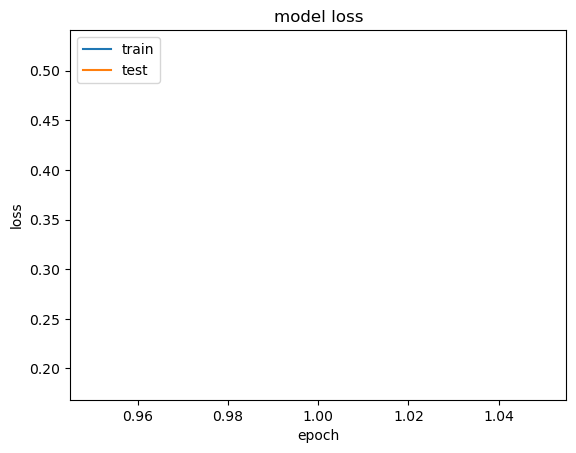

In [162]:
# loss 시각화
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 학습된 가중치 불러와서 평가

In [ ]:
# best_model.keras 파일을 불러와서 테스트 데이터 손실과 정확도를 출력해보세요.

